In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.218
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4400.43
clflush size	: 64
cache_alignment	: 64
address sizes

In [1]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Mounting my Google Drive and set the cd on the path.
#from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor, Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from tensorflow.python.keras import models, layers 

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Input, Dense, Dropout

from scikeras.wrappers import KerasRegressor

sns.set_style(style=("darkgrid"))
plt.figure(figsize=(10, 8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [3]:
#drive.mount('/content/drive/', force_remount=True)
#%cd /content/drive/My Drive/Machine_learning_project/restaurant-revenue-prediction

Mounted at /content/drive/
/content/drive/My Drive/Machine_learning_project/restaurant-revenue-prediction


In [6]:
df = pd.read_csv("/restaurant-revenue-prediction/train.csv")
df_test = pd.read_csv("test.csv")
# Dataset is now stored in a Pandas Dataframe
df_test

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,01/05/2000,Antalya,Other,FC,5,5.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
99996,99996,07/18/2011,Niğde,Other,IL,1,2.0,4.0,3.0,1,...,1.0,3.0,5,0,0,0,4,0,0,0
99997,99997,12/29/2012,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,...,4.0,1.0,5,5,3,2,4,4,4,2
99998,99998,10/12/2013,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,...,7.5,5.0,0,0,0,4,0,0,0,0


# Inspect the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

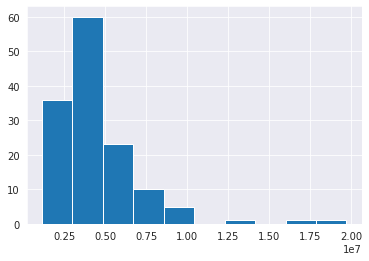

In [ ]:
#Inspect the revenue column
df['revenue'].hist()

In [4]:
#Create function to transform Open Date to category
def transform_date(dataframe):
    today = date.today()
    days = []
    for value in dataframe["Open Date"].values:
        opening_date = datetime.strptime(value, "%m/%d/%Y").date()
        delta = today - opening_date
        day = delta.days
        days.append(day)

    dataframe["Open Date"] = pd.Series(days, name="Open Days")
    return dataframe

In [7]:
df = transform_date(df)
df_test = transform_date(df_test)
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,8501,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,5367,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,3517,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,3918,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,4917,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


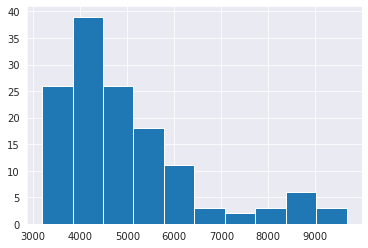

In [ ]:
df['Open Date'].hist()

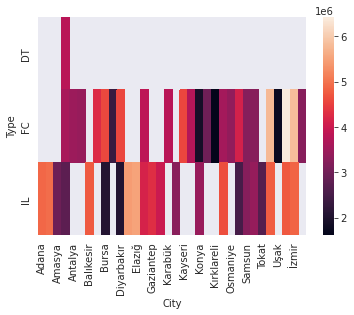

In [ ]:
df_num = df[['Type', 'City', 'revenue']].pivot_table(index='Type', columns='City', values='revenue')
sns.heatmap(df_num)
#df_num.head()

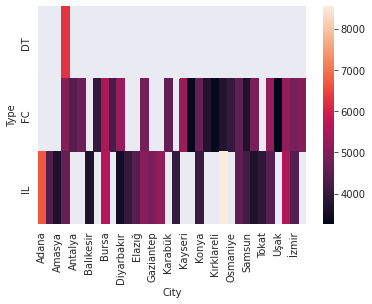

In [ ]:
df_num = df[['Type', 'City', 'Open Date']].pivot_table(index='Type', columns='City', values='Open Date')
sns.heatmap(df_num)

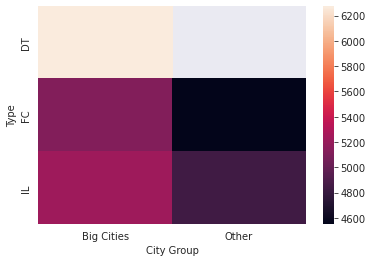

In [ ]:
df_num = df[['Type', 'City Group', 'Open Date']].pivot_table(index='Type', columns='City Group', values='Open Date')
sns.heatmap(df_num)

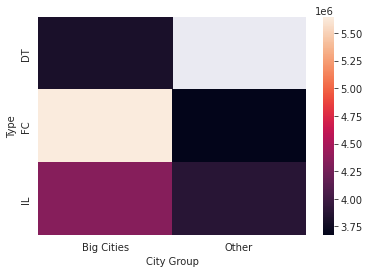

In [ ]:
df_num = df[['Type', 'City Group', 'revenue']].pivot_table(index='Type', columns='City Group', values='revenue')
sns.heatmap(df_num)

# Preprocess data

In [8]:
X_train = df.drop(["Id", "City", "revenue"], axis=1)
X_test = df_test.drop(["Id", "City"], axis=1)
y_train = df["revenue"]

In [ ]:
X_train.describe()

,Open Date,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,4960.262774,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.222628,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788
std,1471.257507,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,2.308806,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768
min,3190.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3956.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4622.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,2.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5437.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,4.000000,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000
max,9661.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,12.500000,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000


# Split numeric and categorical values

In [9]:
X_train_num = X_train.select_dtypes(include=("int64", "float64"))
X_test_num = X_test.select_dtypes(include=("int64", "float64"))
X_test_num.head()

,Open Date,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,4294,1,4.0,4.0,4.0,1,2,5,4,5,...,2.0,3.0,0,0,0,0,0,0,0,0
1,4239,3,4.0,4.0,4.0,2,2,5,3,4,...,1.0,3.0,0,0,0,0,0,0,0,0
2,3282,3,4.0,4.0,4.0,2,2,5,4,4,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3459,2,4.0,4.0,4.0,2,3,5,4,5,...,2.0,3.0,0,4,0,0,0,0,0,0
4,3373,2,4.0,4.0,4.0,1,2,5,4,5,...,5.0,3.0,0,0,0,0,0,0,0,0


In [10]:
X_train_cat = X_train.select_dtypes(include=("object"))
X_test_cat = X_test.select_dtypes(include=("object"))
X_test_cat.head()

,City Group,Type
0,Other,FC
1,Other,IL
2,Big Cities,FC
3,Other,IL
4,Other,FC


In [11]:
#Pipeline to process numerical data
num_pipeline = Pipeline([("imputer", SimpleImputer(strategy="median")),
                         ("scaler", StandardScaler())])

In [12]:
#Preprocess all data
num_features_name = list(X_train_num.columns)
cat_ordinal_name = ["City Group"]
cat_onehot_name = ["Type"]

full_pipeline = ColumnTransformer([("num features", num_pipeline, num_features_name),
                                   ("ordinal encoding", OrdinalEncoder(), cat_ordinal_name),
                                   ("one hot encoding", OneHotEncoder(), cat_onehot_name)])

X_test_preprocessed = full_pipeline.fit_transform(X_test)
X_train_preprocessed = full_pipeline.transform(X_train)

In [13]:
dataframe = pd.DataFrame(X_train_preprocessed)
dataframe_test = pd.DataFrame(X_test_preprocessed)
dataframe_test.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,-0.483496,-1.097791,-0.299599,-0.255683,-0.382329,-0.928924,-0.575870,-0.137939,-0.541757,-0.147643,...,-0.643361,-0.450052,-0.567659,-0.517346,-0.580411,1.0,0.0,1.0,0.0,0.0
1,-0.514935,-0.386793,-0.299599,-0.255683,-0.382329,0.009772,-0.575870,-0.137939,-1.123666,-0.734971,...,-0.643361,-0.450052,-0.567659,-0.517346,-0.580411,1.0,0.0,0.0,1.0,0.0
2,-1.061970,-0.386793,-0.299599,-0.255683,-0.382329,0.009772,-0.575870,-0.137939,-0.541757,-0.734971,...,-0.643361,-0.450052,-0.567659,-0.517346,-0.580411,0.0,0.0,1.0,0.0,0.0
3,-0.960794,-0.742292,-0.299599,-0.255683,-0.382329,0.009772,0.077118,-0.137939,-0.541757,-0.147643,...,-0.643361,-0.450052,-0.567659,-0.517346,-0.580411,1.0,0.0,0.0,1.0,0.0
4,-1.009953,-0.742292,-0.299599,-0.255683,-0.382329,-0.928924,-0.575870,-0.137939,-0.541757,-0.147643,...,-0.643361,-0.450052,-0.567659,-0.517346,-0.580411,1.0,0.0,1.0,0.0,0.0


In [14]:
#Use PCA to decrease number of features
pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transform(dataframe)
X_test_pca = pca.transform(dataframe_test)
pca.n_components_

27

In [15]:
Xtrain_regressors = X_train_pca
Xtest_regressors = X_test_pca
ytrain_regressors = y_train
print(Xtrain_regressors.shape)
print(ytrain_regressors.shape)

(137, 27)
(137,)


# Find best regressor with best params

In [16]:
tuned_param_svr = [{'kernel': ['rbf'],
                    'epsilon': [1e-3, 1e-2, 1e-1, 1],
                    'gamma': [1e-3, 1e-4],
                    'C': [1, 10, 100, 1000],
                    },
                    {'kernel': ['linear'],
                     'epsilon': [1e-3, 1e-2, 1e-1, 1],
                    'gamma': [1e-3, 1e-4],
                    'C': [1, 10, 100, 1000],
                    },
                   {'kernel': ['poly'],
                     'epsilon': [1e-3, 1e-2, 1e-1, 1],
                    'gamma': [1e-3, 1e-4],
                    'C': [1, 10, 100, 1000],
                    },
                   {'kernel': ['sigmoid'],
                     'epsilon': [1e-3, 1e-2, 1e-1, 1],
                    'gamma': [1e-3, 1e-4],
                    'C': [1, 10, 100, 1000],
                    }
                   ]
tuned_param_abr = [{'n_estimators':[500,1000,2000],
                    'learning_rate':[.001,0.01,.1],
                    'random_state':[1, 2, 3]
                    }
                   ]
tuned_param_knn = [{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
                    'weights': ['uniform','distance'],
                    'metric': ['euclidean', 'manhattan', 'minkowski']
                    }
                   ]
tuned_param_sgd = [{
                    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
                    'max_iter': [10000], # number of epochs
                    'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], # logistic regression,
                    'penalty': ['l1', 'l2', 'elasticnet'],
                    }
                  ]
tuned_param_r = [{
                    'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
                    }
                  ]
tuned_param_l = [{
                    'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
                    }
                 ]


In [17]:
models = {
    'svr': {'name': 'Support Vector Regressor',
           'estimator': SVR(), 
           'param': tuned_param_svr,
          },
    'abr': {'name': 'AdaBoost Regressor',
           'estimator': AdaBoostRegressor(),
           'param': tuned_param_abr,
          },
    'knr':{'name': 'KNeighbors Regressor',
           'estimator': KNeighborsRegressor(), 
           'param': tuned_param_knn
          },
    'sgd':{'name': 'SGD Regressor',
           'estimator': SGDRegressor(),
           'param': tuned_param_sgd
          },
    'r':{'name': 'Ridge',
           'estimator': Ridge(),
           'param': tuned_param_r
    },
    'l':{'name': 'Lasso',
           'estimator': Lasso(),
           'param': tuned_param_l
    }
}

In [18]:
best_scores = {}
best_params = {}
#scores_on_test_set = {}
for key in models:
  model = GridSearchCV(estimator=models[key]['estimator'], param_grid=models[key]['param'], scoring='neg_root_mean_squared_error')
  model.fit(Xtrain_regressors, ytrain_regressors)
  best_scores[models[key]['name']] = model.best_score_
  best_params[models[key]['name']] = model.best_params_
print(best_scores)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linea

{'Support Vector Regressor': -2544211.7854674375, 'AdaBoost Regressor': -2453307.7906337855, 'KNeighbors Regressor': -2344581.3373125563, 'SGD Regressor': -2442544.125422759, 'Ridge': -3077972.9178781994, 'Lasso': -3170407.2124743764}


In [19]:
best_model = ""
best_score = -np.inf
best_param = ""
for key, value in best_scores.items():
  if value > best_score:
    best_model = key
    best_score = value
    best_param = best_params[key]
print("The best model is " + best_model + " with score " + str(best_score) + " with params " + str(best_param) + ".")

The best model is KNeighbors Regressor with score -2344581.3373125563 with params {'metric': 'euclidean', 'n_neighbors': 21, 'weights': 'distance'}.


#Using neural network

In [20]:
num_pipeline2 = Pipeline([("imputer", SimpleImputer(strategy="median")),
                         ("scaler", MinMaxScaler())])

num_features_name = list(X_train_num.columns)
cat_ordinal_name = ["City Group"]
cat_onehot_name = ["Type"]

full_pipeline_nn = ColumnTransformer([("num features", num_pipeline2, num_features_name),
                                   ("ordinal encoding", OrdinalEncoder(), cat_ordinal_name),
                                   ("one hot encoding", OneHotEncoder(), cat_onehot_name)])

X_train_preprocessed_nn = full_pipeline_nn.fit_transform(X_train)

In [ ]:
dataframe2 = pd.DataFrame(X_train_preprocessed_nn)

pca_nn = PCA(n_components=0.95)
X_train_nn_pca = pca_nn.fit_transform(dataframe2)
pca_nn.n_components_

In [22]:
Xtrain = X_train_nn_pca
ytrain = y_train
print(Xtrain.shape)
print(ytrain.shape)

(137, 13)
(137,)


In [23]:
df = pd.DataFrame(ytrain)
df.head()

,revenue
0,5653753.0
1,6923131.0
2,2055379.0
3,2675511.0
4,4316715.0


In [25]:
tuned_param_nn = [
    {
        'batch_size': [8, 16, 32],
        'epochs': [20, 40, 60],
        'optimizer': ['SGD'],
        'optimizer__learning_rate': [0.001, 0.01, 0.1],
        'optimizer__momentum': [0.2, 0.4, 0.6],
        'model__activation': ['relu'],
        'model__dropout_rate': [0.1, 0.2, 0.3, 0.4]
    }
]

In [ ]:
def create_model(optimizer='SGD', activation='relu', dropout_rate=0.5):
  # create model
  model = Sequential()
  model.add(Dense(16, input_shape=(13,), activation=activation))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8, activation=activation))
  model.add(Dropout(dropout_rate))
  model.add(Dense(4, activation=activation))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, activation='sigmoid'))
	# Compile model
  model.compile(loss='mean_squared_error', optimizer=optimizer)
  return model

In [ ]:
#Tune neural network to find best params
model = KerasRegressor(model=create_model, verbose=1)
model = GridSearchCV(estimator=model, param_grid=tuned_param_nn, cv=5, n_jobs=-1, scoring='neg_root_mean_squared_error')
model.fit(Xtrain, ytrain)
print(model.best_score_)
print(model.best_params_)

Epoch 1/60
18/18 [==============================] - 1s 2ms/step - loss: 26421659435008.0000
Epoch 2/60
18/18 [==============================] - 0s 2ms/step - loss: 26421659435008.0000
Epoch 3/60
18/18 [==============================] - 0s 2ms/step - loss: 26421659435008.0000
Epoch 4/60
18/18 [==============================] - 0s 3ms/step - loss: 26421659435008.0000
Epoch 5/60
18/18 [==============================] - 0s 2ms/step - loss: 26421663629312.0000
Epoch 6/60
18/18 [==============================] - 0s 2ms/step - loss: 26421655240704.0000
Epoch 7/60
18/18 [==============================] - 0s 2ms/step - loss: 26421661532160.0000
Epoch 8/60
18/18 [==============================] - 0s 2ms/step - loss: 26421657337856.0000
Epoch 9/60
18/18 [==============================] - 0s 2ms/step - loss: 26421661532160.0000
Epoch 10/60
18/18 [==============================] - 0s 2ms/step - loss: 26421657337856.0000
Epoch 11/60
18/18 [==============================] - 0s 2ms/step - loss: 264216

In [ ]:
#Build neural network with best params
BATCH_SIZE = 8
EPOCHS = 60
DROPOUT_RATE = 0.2
LEARNING_RATE = 0.01
MOMENTUM = 0.2

optimizer = keras.optimizers.SGD(learning_rate = LEARNING_RATE, momentum=MOMENTUM)
model = create_model(optimizer = optimizer, dropout_rate = DROPOUT_RATE)
estimator = KerasRegressor(build_fn=model, verbose=1)
scores = cross_val_score(estimator, Xtrain, ytrain, scoring='neg_mean_squared_error', cv=5, fit_params={'batch_size': BATCH_SIZE, 'epochs': EPOCHS}, error_score="raise")
print(np.mean(scores))

Epoch 1/60


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


14/14 [==============================] - 1s 2ms/step - loss: 24126100078592.0000
Epoch 2/60
14/14 [==============================] - 0s 2ms/step - loss: 24126100078592.0000
Epoch 3/60
14/14 [==============================] - 0s 2ms/step - loss: 24126100078592.0000
Epoch 4/60
14/14 [==============================] - 0s 2ms/step - loss: 24126100078592.0000
Epoch 5/60
14/14 [==============================] - 0s 2ms/step - loss: 24126100078592.0000
Epoch 6/60
14/14 [==============================] - 0s 2ms/step - loss: 24126100078592.0000
Epoch 7/60
14/14 [==============================] - 0s 2ms/step - loss: 24126100078592.0000
Epoch 8/60
14/14 [==============================] - 0s 2ms/step - loss: 24126100078592.0000
Epoch 9/60
14/14 [==============================] - 0s 2ms/step - loss: 24126100078592.0000
Epoch 10/60
14/14 [==============================] - 0s 2ms/step - loss: 24126100078592.0000
Epoch 11/60
14/14 [==============================] - 0s 2ms/step - loss: 24126100078592.00

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


14/14 [==============================] - 0s 2ms/step - loss: 27572584841216.0000
Epoch 2/60
14/14 [==============================] - 0s 2ms/step - loss: 27572586938368.0000
Epoch 3/60
14/14 [==============================] - 0s 2ms/step - loss: 27572586938368.0000
Epoch 4/60
14/14 [==============================] - 0s 2ms/step - loss: 27572586938368.0000
Epoch 5/60
14/14 [==============================] - 0s 2ms/step - loss: 27572586938368.0000
Epoch 6/60
14/14 [==============================] - 0s 2ms/step - loss: 27572586938368.0000
Epoch 7/60
14/14 [==============================] - 0s 2ms/step - loss: 27572586938368.0000
Epoch 8/60
14/14 [==============================] - 0s 2ms/step - loss: 27572586938368.0000
Epoch 9/60
14/14 [==============================] - 0s 2ms/step - loss: 27572584841216.0000
Epoch 10/60
14/14 [==============================] - 0s 2ms/step - loss: 27572589035520.0000
Epoch 11/60
14/14 [==============================] - 0s 2ms/step - loss: 27572584841216.00

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


14/14 [==============================] - 0s 2ms/step - loss: 27150639955968.0000
Epoch 2/60
14/14 [==============================] - 0s 2ms/step - loss: 27150637858816.0000
Epoch 3/60
14/14 [==============================] - 0s 2ms/step - loss: 27150637858816.0000
Epoch 4/60
14/14 [==============================] - 0s 2ms/step - loss: 27150639955968.0000
Epoch 5/60
14/14 [==============================] - 0s 2ms/step - loss: 27150642053120.0000
Epoch 6/60
14/14 [==============================] - 0s 2ms/step - loss: 27150642053120.0000
Epoch 7/60
14/14 [==============================] - 0s 2ms/step - loss: 27150642053120.0000
Epoch 8/60
14/14 [==============================] - 0s 2ms/step - loss: 27150637858816.0000
Epoch 9/60
14/14 [==============================] - 0s 2ms/step - loss: 27150639955968.0000
Epoch 10/60
14/14 [==============================] - 0s 2ms/step - loss: 27150637858816.0000
Epoch 11/60
14/14 [==============================] - 0s 2ms/step - loss: 27150639955968.00

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


14/14 [==============================] - 0s 2ms/step - loss: 25938918113280.0000
Epoch 2/60
14/14 [==============================] - 0s 2ms/step - loss: 25938918113280.0000
Epoch 3/60
14/14 [==============================] - 0s 2ms/step - loss: 25938918113280.0000
Epoch 4/60
14/14 [==============================] - 0s 2ms/step - loss: 25938920210432.0000
Epoch 5/60
14/14 [==============================] - 0s 2ms/step - loss: 25938920210432.0000
Epoch 6/60
14/14 [==============================] - 0s 2ms/step - loss: 25938918113280.0000
Epoch 7/60
14/14 [==============================] - 0s 2ms/step - loss: 25938920210432.0000
Epoch 8/60
14/14 [==============================] - 0s 2ms/step - loss: 25938918113280.0000
Epoch 9/60
14/14 [==============================] - 0s 2ms/step - loss: 25938920210432.0000
Epoch 10/60
14/14 [==============================] - 0s 2ms/step - loss: 25938918113280.0000
Epoch 11/60
14/14 [==============================] - 0s 2ms/step - loss: 25938920210432.00

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


14/14 [==============================] - 0s 2ms/step - loss: 27309604077568.0000
Epoch 2/60
14/14 [==============================] - 0s 2ms/step - loss: 27309604077568.0000
Epoch 3/60
14/14 [==============================] - 0s 2ms/step - loss: 27309599883264.0000
Epoch 4/60
14/14 [==============================] - 0s 2ms/step - loss: 27309599883264.0000
Epoch 5/60
14/14 [==============================] - 0s 2ms/step - loss: 27309597786112.0000
Epoch 6/60
14/14 [==============================] - 0s 2ms/step - loss: 27309604077568.0000
Epoch 7/60
14/14 [==============================] - 0s 2ms/step - loss: 27309604077568.0000
Epoch 8/60
14/14 [==============================] - 0s 2ms/step - loss: 27309597786112.0000
Epoch 9/60
14/14 [==============================] - 0s 2ms/step - loss: 27309599883264.0000
Epoch 10/60
14/14 [==============================] - 0s 2ms/step - loss: 27309606174720.0000
Epoch 11/60
14/14 [==============================] - 0s 2ms/step - loss: 27309599883264.00

1/1 [==============================] - 0s 63ms/step
-26388643552484.13


In [ ]:
#Compare best regressor with neural network
if (best_score > np.mean(scores)):
  print("The best model is " + best_model + " with the score of " + str(best_score) + ".")
else:
  print("The best model is the neural network with the score of " + str(np.mean(scores)) + ".")

The best model is KNeighbors Regressor with the score of -5795686580515.175.


# Use best estimator to compute the predictions

In [ ]:
#Build best estimator to use for predictions
params = {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
estimator = KNeighborsRegressor(**params)
estimator = estimator.fit(Xtrain_regressors, ytrain_regressors)

In [ ]:
#Predict the revenuess
y_pred = estimator.predict(Xtest_regressors)
df_predictions = pd.DataFrame(y_pred)

In [ ]:
#Create column 'Id' and rename column 0 to 'Prediction'
df_predictions['Id'] = df_predictions.index
df_predictions.rename(columns = {0:'Prediction'}, inplace = True)

In [ ]:
#define function to swap columns
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

#swap points and rebounds columns
df_predictions = swap_columns(df_predictions, 'Id', 'Prediction')

#view updated DataFrame
print(df_predictions)


          Id    Prediction
0          0  4.232444e+06
1          1  2.906330e+06
2          2  3.701805e+06
3          3  3.586096e+06
4          4  4.250782e+06
...      ...           ...
99995  99995  4.148054e+06
99996  99996  2.783140e+06
99997  99997  4.374469e+06
99998  99998  5.311069e+06
99999  99999  3.895451e+06

[100000 rows x 2 columns]


In [ ]:
f = open("predictions.csv", "w")
f.write(df_predictions.to_csv(index=False))
f.close()